1st data set: [[  2.91180854  60.35961272]
 [  3.77474554 344.1492843 ]
 [  2.61548828 178.22208681]
 ...
 [  2.96909526  20.24997848]
 [  3.95753102  27.26196973]
 [  4.02533402  12.23316511]]


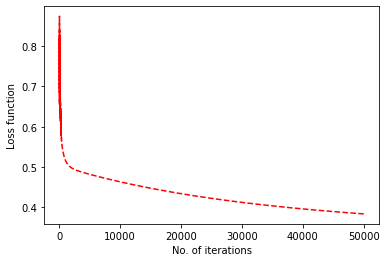

Accuracy on test set by our first model       :   88.0
2nd data set:  [[3.7594805  7.5079397 ]
 [3.42205706 4.99120267]
 [2.77881751 4.11207082]
 ...
 [3.54410545 2.64987938]
 [2.57546055 2.51725473]
 [3.5608151  3.99184993]]


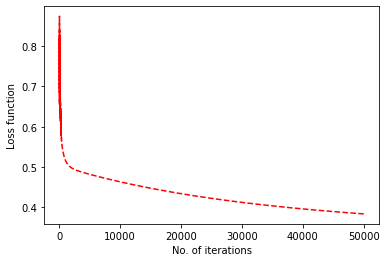

Accuracy on test set by our second model       :   92.0


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings( "ignore" )
  


# Logistic Regression
class LogitRegression() :
    def __init__( self, learning_rate, iterations ) :        
        self.learning_rate = learning_rate        
        self.iterations = iterations
        self.err=[]
          
    # Function for model training    
    def fit( self, X, Y ) :        
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape        
        # weight initialization        
        self.W = np.zeros( self.n )        
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()
            yp = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )
            loss_val= self.loss(yp,Y)
            self.err.append(loss_val)
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
          
        # calculate gradients        
        tmp = ( A - self.Y.T )        
        tmp = np.reshape( tmp, self.m )        
        dW = np.dot( self.X.T, tmp ) / self.m         
        db = np.sum( tmp ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db
          
        return self
      
   
      
    def predict( self, X ) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 )        
        return Y
    
    def loss(self,h,y):
        val=[]
        p= len(h)
        for i in range(0,p):
            val.append((-y[i])*np.log(h[i])-(1-y[i])*np.log(1-h[i]))
        return np.mean(val)
    

    
    
    def plot_graph(self,yp,yt):
        X1= range(0, self.iterations)
          
        Y1= self.err
        plt.plot(X1,Y1, color='red', linestyle='--')
        plt.xlabel('No. of iterations')
        plt.ylabel('Loss function')
        plt.show()
    
   

  
def main() :
      
    # Importing dataset    
    df_train = pd.read_csv( "D:\Python\My files\ds1_train.csv" )
    X = df_train.iloc[:,:-1].values
    print("1st data set:" , X)
    Y = df_train.iloc[:,-1:].values
   
    df_test = pd.read_csv("D:\Python\My files\ds1_test.csv")   
    
    Y_train= df_train['y']
    X_train= df_train.drop('y',axis=1)
    Y_test= df_test['y']
    X_test= df_test.drop('y',axis=1)
   
      
        
    model = LogitRegression( learning_rate = 0.001, iterations = 50000 )
      
    model.fit( X_train, Y_train )    
    
    # Prediction on test set
    Y_pred = model.predict( X_test )    
    
   
    #Plotting loss function
    model.plot_graph(Y_pred,Y_train)
    
    # measure performance    
    performance = 0    
    # counter    
    count = 0    
    for count in range( np.size( Y_pred ) ) :  
        
        if Y_test[count] == Y_pred[count] :            
            performance = performance + 1
          
        count = count + 1
          
    print( "Accuracy on test set by our first model       :  ", ( performance / count ) * 100 )
    
    
    df2_train = pd.read_csv( "D:\Python\My files\ds2_train.csv" )
    X2 = df2_train.iloc[:,:-1].values
    print("2nd data set: " , X2)
    Y2 = df2_train.iloc[:,-1:].values
   
    df2_test = pd.read_csv("D:\Python\My files\ds2_test.csv")   
    
    Y2_train= df2_train['y']
    X2_train= df2_train.drop('y',axis=1)
    Y2_test= df2_test['y']
    X2_test= df2_test.drop('y',axis=1)
   
      
        
    model2 = LogitRegression( learning_rate = 0.001, iterations = 50000 )
      
    model2.fit( X2_train, Y2_train )    
    
    # Prediction on test set
    Y2_pred = model2.predict( X2_test )    
    
     #Plotting loss function
    model.plot_graph(Y2_pred,Y2_train) 
    
      
    # measure performance    
    performance2 = 0    
    # counter    
    count2 = 0    
    for count2 in range( np.size( Y2_pred ) ) :  
        
        if Y2_test[count2] == Y2_pred[count2] :            
            performance2 = performance2 + 1
          
       
              
        count2 = count2 + 1
          
    print( "Accuracy on test set by our second model       :  ", ( performance2 / count2 ) * 100 )
    
  
  
if __name__ == "__main__" :     
    main()